In [3]:
import pandas as pd
import numpy as np

In [130]:
df=pd.read_csv("SAADAA_assessment_data - Sheet1.csv")
df.head()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,04:51.9,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,39:38.4,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,15:18.9,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,52:58.4,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,17:39.5,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0


In [16]:
df["customer_type"].value_counts().sort_values(ascending=False)

customer_type
Returning    810
New          190
Name: count, dtype: int64

In [17]:
df["customer_location"].value_counts().sort_values(ascending=False)

customer_location
Pune         136
Kolkata      133
Bangalore    132
Delhi        131
Mumbai       129
Chennai      120
Jaipur       112
Hyderabad    107
Name: count, dtype: int64

In [18]:
df["order_frequency"].value_counts().sort_values(ascending=False)

order_frequency
6    127
8    120
7    116
3    112
1    112
4    111
5    103
2    100
9     99
Name: count, dtype: int64

In [24]:
df[["order_value", "order_id"]].sort_values("order_value", ascending=False)

,order_value,order_id
43,7251.06,ORD000044
212,7157.30,ORD000213
537,6549.57,ORD000538
6,6396.56,ORD000007
214,6390.36,ORD000215
...,...,...
573,500.00,ORD000574
341,500.00,ORD000342
343,500.00,ORD000344
144,500.00,ORD000145


In [28]:
df["product_category"].value_counts()

product_category
Jackets        175
Jeans          173
T-Shirts       169
Shirts         169
Dresses        166
Sweatshirts    148
Name: count, dtype: int64

In [31]:
df["inventory_status"].value_counts()

inventory_status
In Stock        899
Out of Stock    101
Name: count, dtype: int64

In [35]:
df["source"].value_counts()

source
Email Marketing    219
Facebook Ads       219
Word of Mouth      190
Instagram          187
Google Ads         185
Name: count, dtype: int64

In [38]:
df["customer_type"].value_counts()

customer_type
Returning    810
New          190
Name: count, dtype: int64

In [50]:
df[["discount_applied", "customer_id", "order_frequency"]].sort_values(by="discount_applied", ascending=False)

,discount_applied,customer_id,order_frequency
399,50,CUST00400,8
920,50,CUST00921,6
886,50,CUST00887,5
860,50,CUST00861,1
513,50,CUST00514,9
...,...,...,...
396,0,CUST00397,4
400,0,CUST00401,6
409,0,CUST00410,8
766,0,CUST00767,6


In [44]:
df["size"].value_counts()

size
S      233
XXL    198
M      197
L      186
XL     186
Name: count, dtype: int64

In [53]:
df["return_status"].value_counts()

return_status
No     796
Yes    204
Name: count, dtype: int64

In [107]:
temp_df=df.groupby("product_category")["return_status"].value_counts().unstack()
temp_df

return_status,No,Yes
product_category,,
Dresses,134,32
Jackets,145,30
Jeans,132,41
Shirts,131,38
Sweatshirts,117,31
T-Shirts,137,32


In [120]:
temp_df["return_percentage"]=(temp_df["Yes"].values)/(temp_df["No"].values+temp_df["Yes"].values)*100

In [121]:
temp_df

return_status,No,Yes,return_percentage
product_category,,,
Dresses,134,32,19.277108
Jackets,145,30,17.142857
Jeans,132,41,23.699422
Shirts,131,38,22.485207
Sweatshirts,117,31,20.945946
T-Shirts,137,32,18.934911


In [124]:
df["inventory_status"].value_counts()

inventory_status
In Stock        899
Out of Stock    101
Name: count, dtype: int64

# Now Making a Linear Regression Model to predict if a customer will return the order or not

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

describing the data

In [131]:
df.describe()

,customer_tenure,order_value,order_frequency,discount_applied,engagement_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,31.200000,2600.555060,5.032000,14.72000,50.435000
std,17.372905,1394.337968,2.551762,14.22758,28.985582
min,1.000000,500.000000,1.000000,0.00000,0.000000
25%,17.000000,1565.915000,3.000000,0.00000,26.000000
50%,32.000000,2541.280000,5.000000,15.00000,51.000000
75%,47.000000,3541.415000,7.000000,25.00000,76.000000
max,60.000000,7251.060000,9.000000,50.00000,100.000000


In [134]:
df.isnull().sum()

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_date           0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
dtype: int64

encoding the target column

In [135]:
df['return_status'] = df['return_status'].map({'No': 0, 'Yes': 1})

 Feature Engineering: Extract relevant features

In [136]:
df['total_orders'] = df.groupby('product_category')['order_id'].transform('count')
df['total_returns'] = df.groupby('product_category')['return_status'].transform('sum')
df['average_order_value'] = df.groupby('product_category')['order_value'].transform('mean')

train_test_split

In [137]:
X = df[['customer_tenure', 'order_value', 'order_frequency', 'discount_applied', 'engagement_score', 'total_orders', 'total_returns', 'average_order_value']]
y = df['return_status']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
lr=LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [143]:
y_pred=lr.predict(X_test)

In [147]:
mae= mean_absolute_error(y_test, y_pred)

print("mean absolute error =", mae)

mean absolute error = 0.322448983405536


In [148]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

     Actual  Predicted
521       0   0.160952
737       1   0.153244
740       0   0.272012
660       0   0.221863
411       0   0.206342
..      ...        ...
408       0   0.238522
332       0   0.176210
208       0   0.173405
613       0   0.281567
78        0   0.267755

[200 rows x 2 columns]


By this model we can do:

Inventory Management:

You can improve inventory management by maintaining adequate stock levels for popular items and sizes.

Customer Satisfaction:

You can increase customer satisfaction by focusing on products with higher return rates and improving them.

# Required Visualizations

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

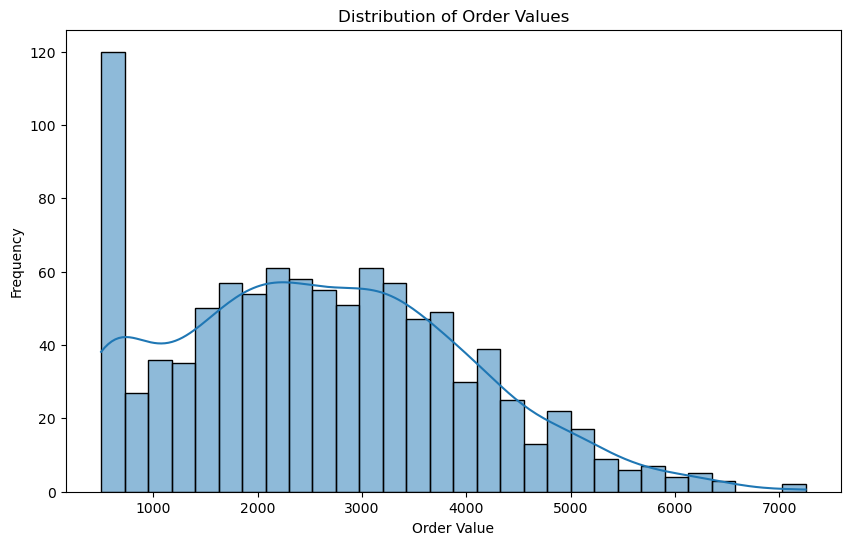

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(df['order_value'], bins=30, kde=True)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

Insights:

Order Value Range: The majority of orders fall within a specific price range.

High-Value Orders: There are a few high-value orders indicating premium purchases.

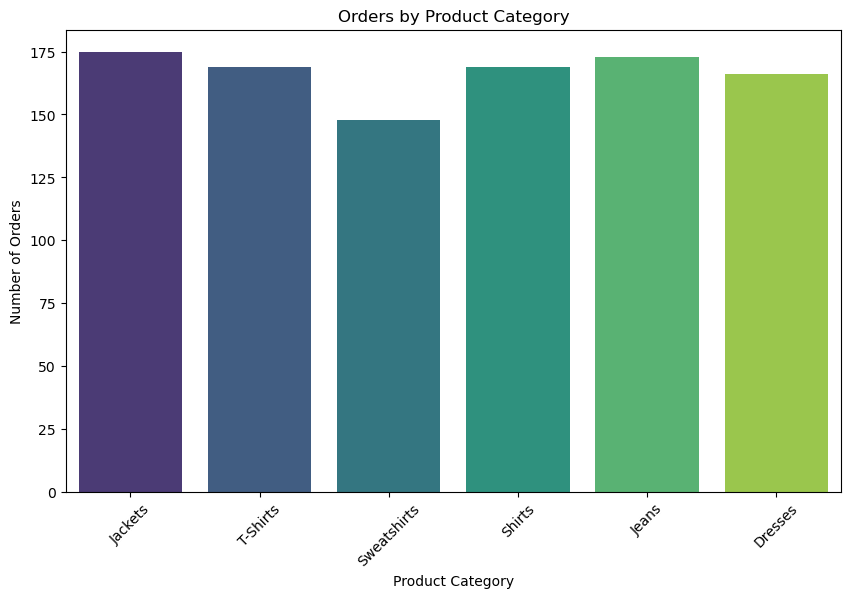

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', data=df, palette='viridis')
plt.title('Orders by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Insights:

Popular Categories: T-Shirts and Jackets are the most frequently ordered categories.

Less Popular Categories: Categories sweatshrits have fewer orders.

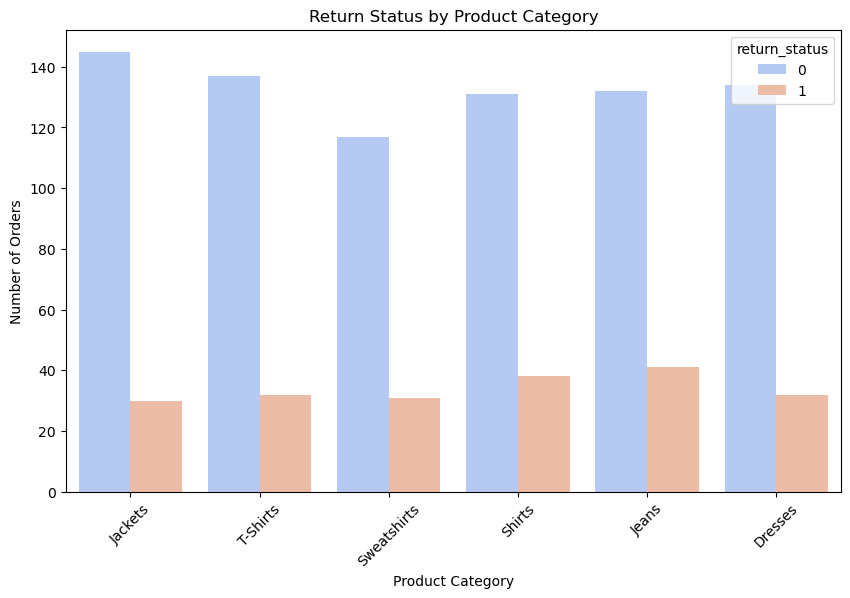

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', hue='return_status', data=df, palette='coolwarm')
plt.title('Return Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Insights:

High Returns: Some categories like Shirts and Jeans have higher return rates.

Low Returns: Jacket and Dresses have relatively lower return rates.

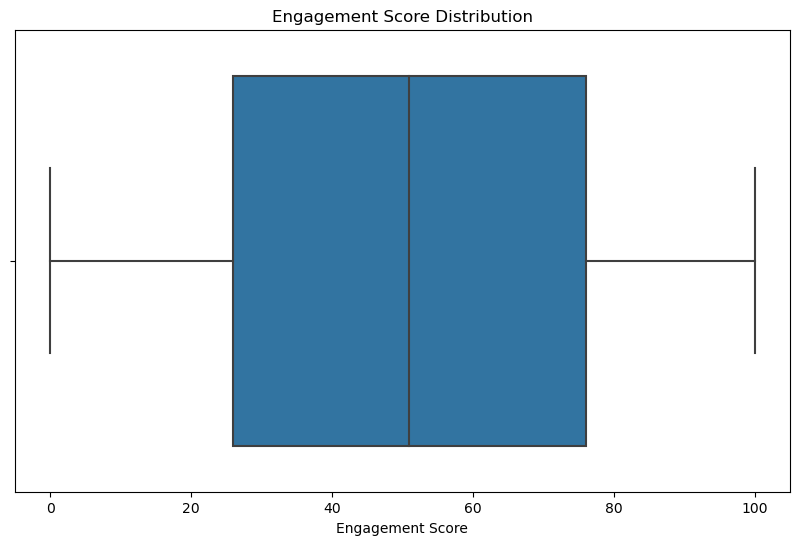

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_score', data=df)
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.show()

Insights:

Engagement Range: There is a wide range of engagement scores among customers.

High Engagement: Some customers have very high engagement scores, indicating strong interaction with the brand.